## Spatial Data Science Conference - 2023 

![image](https://spatial-data-science-conference.com/img/2023/repository/ny-summit-card-1.png)

# Foundations of Geospatial 

#### Danny Sheehan Climate Change Solutions Architect at AWS

## Dependencies

In [243]:
import warnings
warnings.filterwarnings('ignore')

# See README.md for all libraries and steps to create the environment. 

# Geospatial Data Models

> A data model is a way of defining and representing real world surfaces and characteristics in GIS. There are two primary types of spatial data models: Vector and Raster.
Source: http://gsp.humboldt.edu/OLM/Courses/GSP_216_Online/lesson3-1/data-models.html

## Vector
**Vector** data represents features as discrete points, lines, and polygons

## Raster
**Raster**  data represents features as a rectangular matrix of square cells (pixels)

![image.png](img/raster-vector.png)

Source: http://www.geo.umass.edu/courses/geo494a/Chapter2_GIS_Fundamentals.pdf

There's also TIN Data model 

> A triangulated irregular network (TIN)
is a data model commonly used to represent
terrain heights - Source: http://www.geo.umass.edu/courses/geo494a/Chapter2_GIS_Fundamentals.pdf

Typical use cases are for terrain inluts in Hydrologic Modeling / Watershed Modeling. 

![tin](img/tin.png)

Source: http://www.geo.umass.edu/courses/geo494a/Chapter2_GIS_Fundamentals.pdf


# Vector Data Model

> Vector data is very common, and is often used to represent features like roads and boundaries. Vector data comes in the form of points and lines that are geometrically and mathematically associated.  

> * Points:
    * One pair of coordinates defines the location of a point feature.
    * Individual X,Y

> * Polylines (LineStrings):
    * Two or more pairs of coordinates that are connected define a line feature.
    * A series of connected points - Actually, a set of series of connected points.

> * Polygons:
    * Multiple pairs of coordinates that are connected and closed define a polygon feature.
    * A series of connected points that loop back to the first point
      * Multiple "polygons" can exist in one layer
      * Polygons can have internal polygons or "holes"
      * The beginning and ending coordinates for a polygon are the same.
      
      Source: http://gsp.humboldt.edu/OLM/Courses/GSP_216_Online/lesson3-1/data-models.html


# Shapely
One dependency (another Python Library GeoPandas depends on) is [Shapely](https://shapely.readthedocs.io/en/latest/manual.html)

> Shapely is a Python package for set-theoretic analysis and manipulation of planar features using (via Python’s ctypes module) functions from the well known and widely deployed GEOS library. GEOS, a port of the Java Topology Suite (JTS), is the geometry engine of the PostGIS spatial extension for the PostgreSQL RDBMS. The designs of JTS and GEOS are largely guided by the Open Geospatial Consortium’s Simple Features Access Specification 1 and Shapely adheres mainly to the same set of standard classes and operations. Shapely is thereby deeply rooted in the conventions of the geographic information systems (GIS) world, but aspires to be equally useful to programmers working on non-conventional problems.

Source: https://shapely.readthedocs.io/en/latest/manual.html

## Vector
### Points

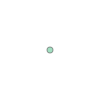

In [2]:
from shapely.geometry import Point
point = Point(0.0, 0.0)
point

### Lines - (LineString)

In [3]:
from shapely.geometry import LineString

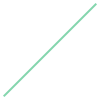

In [4]:
line = LineString([(0, 0), (2, 2)])
line

In [5]:
a = LineString([(0, 0), (1, 1), (1, 2), (2, 2)])
b = LineString([(0, 0), (1, 1), (2, 1), (2, 2)])

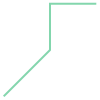

In [6]:
a

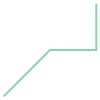

In [7]:
b

#### Intersection of Two LineString Objects

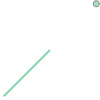

In [8]:
x = a.intersection(b)
x

### Polygons

In [9]:
from shapely.geometry import Polygon

In [181]:
c = Polygon([[1, 1], [-1, 3], [3, 3], [3, 1]])
d = Polygon([[0, 0], [0, 4], [4, 4], [4, 1]])

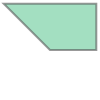

In [11]:
c

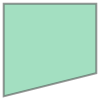

In [12]:
d

#### Intersection of Two Polygons

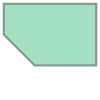

In [13]:
x = c.intersection(d)
x

### MultiPoint

In [14]:
from shapely.geometry import MultiPoint

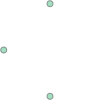

In [15]:
e = MultiPoint([(0, 0), (1, 1), (1, -1)])
e

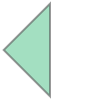

In [16]:
e.convex_hull  # minimum bounding geometry

# Raster Data Model


### Raster

> [Rasters] are frequently represented as a continuous grid of square cells, each containing a value indicating the (estimated) average height or strength of the field in that cell. In most of the literature and within software packages the points/ lines/ areas model is described as vector data, whilst the grid model is described as raster (or image) data. Source: https://www.spatialanalysisonline.com/HTML/index.html


> #### Raster Basics
> A raster is a rectangular grid of pixels with values that can continuous (e.g. elevation) or categorical (e.g. land use). This data structure is very common - jpg images on the web, photos from your digital camera, and the jupyterhub icon are all rasters. Source: https://github.com/geohackweek/raster-2019/blob/master/notebooks/0-introduction.ipynb

> Common properties of any raster:
number of rows and columns (sometimes referred to as lines and samples)
data type (dtype, or bit depth) - e.g., 8-bit (2^8 possible values, 0-255)
some kind of resolution information, often dots per inch (dpi) with raster graphics
A geospatial raster is only different from a digital photo in that it is accompanied by metadata that connects the grid to a particular location. Source: https://github.com/geohackweek/raster-2019/blob/master/notebooks/0-introduction.ipynb

> ![raster_data_model](https://github.com/geohackweek/raster-2019/raw/9fb57bde646eb98b881e0429e6a70ff4f8d077e1/assets/raster_concept.png)
_Source: National Ecological Observatory Network (NEON) via: [https://github.com/geohackweek/raster-2019/blob/master/notebooks/0-introduction.ipynb](https://github.com/geohackweek/raster-2019/blob/master/notebooks/0-introduction.ipynb)_


> ##### Examples of categorical rasters
Some rasters contain categorical data where each pixel represents a discrete class such as a landcover type (e.g., "coniferous forest" or "grassland") rather than a continuous value such as elevation or temperature. Some examples of classified maps include:
* Landcover / land-use maps.
* Snowcover masks (binary snow or no snow)

> The following map shows elevation data for the NEON Harvard Forest field site. In this map, the elevation data (a continuous variable) has been divided up into categories to yield a categorical raster.  Source: https://github.com/geohackweek/raster-2019/blob/master/notebooks/0-introduction.ipynb

> ![category_raster](https://datacarpentry.org/organization-geospatial/fig/USA_landcover_classification.png)
_Source: Homer, C.G., et al., 2015, Completion of the 2011 National Land Cover Database for the conterminous United States-Representing a decade of land cover change information. Photogrammetric Engineering and Remote Sensing, v. 81, no. 5, p. 345-354) via [https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html](https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html)_



#### Raster and Resolution 

>  resolution of a raster represents the area on the ground that each pixel of the raster covers. The image below illustrates the effect of changes in resolution. Source: https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html

> ![raster_resolution](https://datacarpentry.org/organization-geospatial/fig/dc-spatial-raster/raster_resolution.png)
_Source: National Ecological Observatory Network (NEON) via [https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html](https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html)_

#### Multispectral (multiband) Raster

> A raster can contain one or more bands. One type of multi-band raster dataset that is familiar to many of us is a color image. A basic color image consists of three bands: red, green, and blue. Each band represents light reflected from the red, green or blue portions of the electromagnetic spectrum. The pixel brightness for each band, when composited creates the colors that we see in an image. Source: https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html

> ![multispectral_raster](https://datacarpentry.org/organization-geospatial/fig/dc-spatial-raster/RGBSTack_1.jpg)
_Source: National Ecological Observatory Network (NEON) via [https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html](https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html)_


### Let's compare a two maps, one derived by Vector Data and one derived from Raster Data

In [17]:
# source: https://github.com/geohackweek/raster-2019/blob/master/notebooks/3-visualization-and-modis.ipynb
import ipyleaflet
from ipyleaflet import Map, Rectangle, basemaps, basemap_to_tiles, TileLayer, SplitMapControl, Polygon
import ipywidgets
import datetime
import re

bbox = [43.16, -11.32, 43.54, -11.96]
west, north, east, south = bbox
bbox_ctr = [0.5*(north+south), 0.5*(west+east)]

m = Map(center=bbox_ctr, zoom=5)# MODIS great for large areas (onl)

right_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2020-04-01")
left_layer = TileLayer()
control = SplitMapControl(left_layer=left_layer, right_layer=right_layer)
m.add_control(control)

m

Map(center=[-11.64, 43.349999999999994], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_t…

### Let's take a look at some very simple Raster Data model

In [26]:
import numpy as np
import pandas as pd 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# let's allow our dataframe printouts in jupyter to be larger

In [27]:
simple_image = np.load('data/image_file.npy')   
# .npy is a numpy file storage format

### What is this simple_image?

In [29]:
simple_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  11, 104, 159, 159, 232, 195, 102,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  19, 154, 227, 254, 235, 174, 167, 233, 184,   0,   0,
          0,   0],
       [  

### Plotting this image data in Pandas aas an .ndarray like a DataFrame?

In [30]:
pd.DataFrame(simple_image).head(28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,104,159,159,232,195,102,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,154,227,254,235,174,167,233,184,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106,217,254,239,159,23,0,0,68,221,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,72,249,251,131,11,0,0,53,13,2,40,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,26,243,250,72,0,0,5,184,251,103,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,152,254,170,0,0,0,148,254,254,85,0,0,0,0,0,0


### Interesting... Perhaps I can "show this array" somehow!

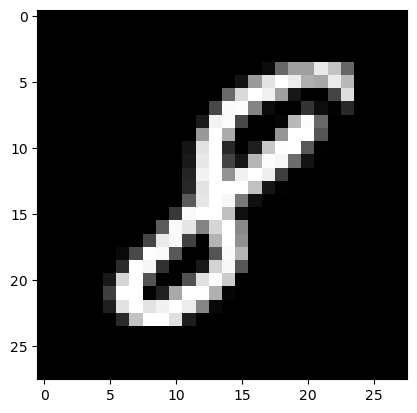

In [36]:
import matplotlib.pyplot as plt

plt.imshow(simple_image, cmap='gray')
plt.show();

### Let's look at some LANDSAT 8 Data

> Bands 2, 3, and 4 are visible blue, green, and red. Source: https://landsat.gsfc.nasa.gov/landsat-8/landsat-8-bands/


Much of this is referenced from: https://automating-gis-processes.github.io/CSC/lessons/L5/overview.html

In [42]:
import urllib

# https://automating-gis-processes.github.io/CSC/notebooks/L5/reading-raster.html
raster_url = 'https://github.com/Automating-GIS-processes/CSC18/raw/master/data/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif'
helsinki_local_file = 'data/raster/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif'

urllib.request.urlretrieve(raster_url, helsinki_local_file)

('data/raster/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif',
 <http.client.HTTPMessage at 0x134eac1c0>)

In [51]:
import rasterio

dataset = rasterio.open(helsinki_file)
dataset

<open DatasetReader name='data/raster/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif' mode='r'>

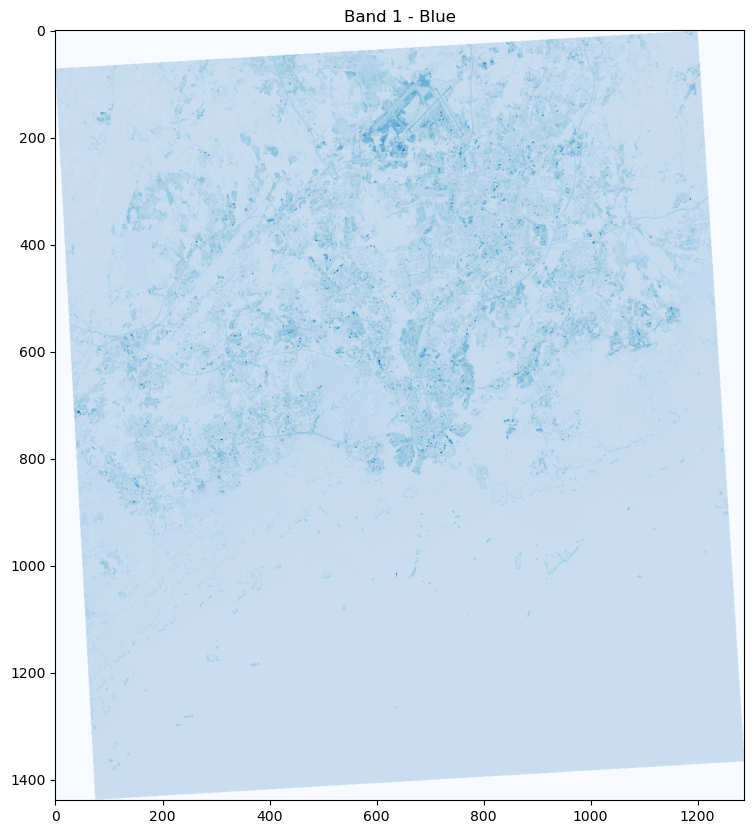

In [78]:
plt.figure(figsize=(20,10))
plt.imshow(dataset.read(1), cmap='Blues')
plt.title('Band 1 - Blue');

In [59]:
dataset.count 
# number of raster bands

7

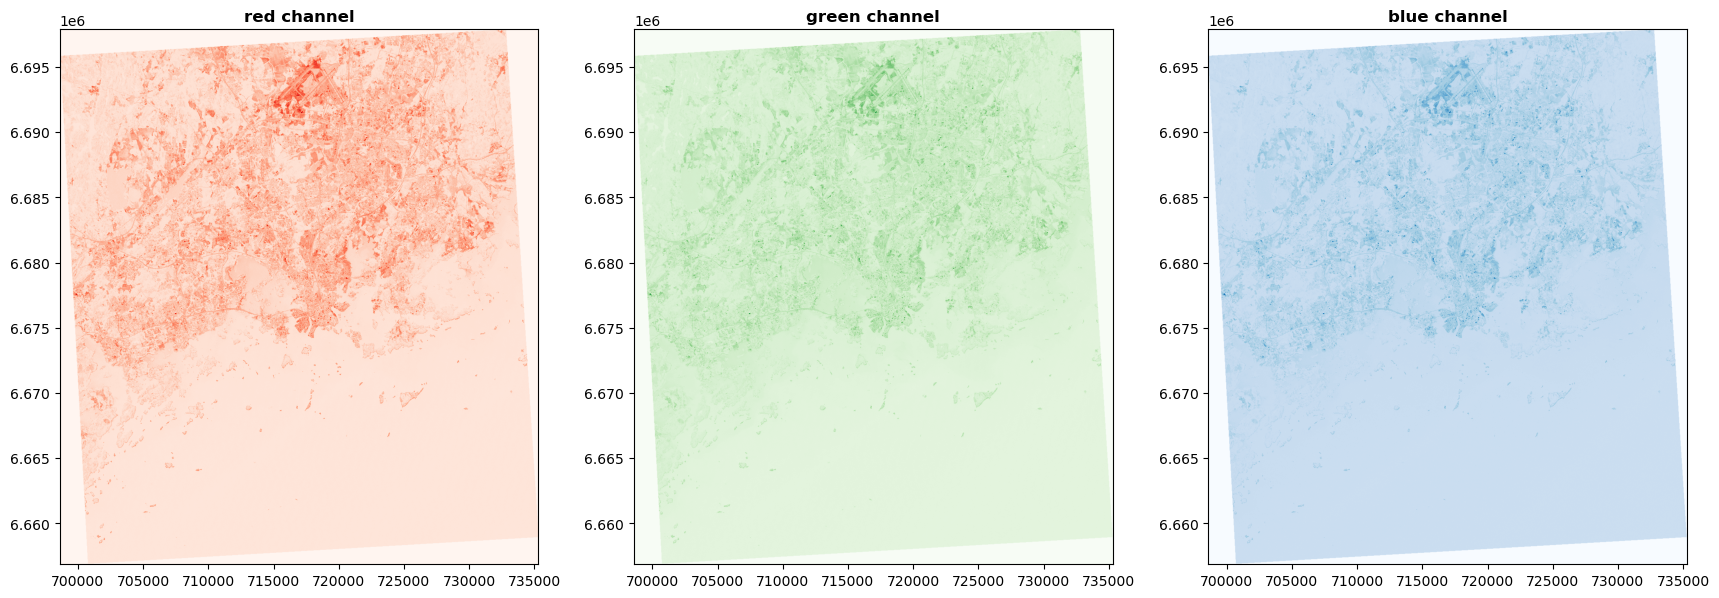

In [89]:
from matplotlib import pyplot

fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
show((dataset, 3), ax=axr, cmap='Reds', title='red channel')
show((dataset, 2), ax=axg, cmap='Greens', title='green channel')
show((dataset, 1), ax=axb, cmap='Blues', title='blue channel')
pyplot.show()

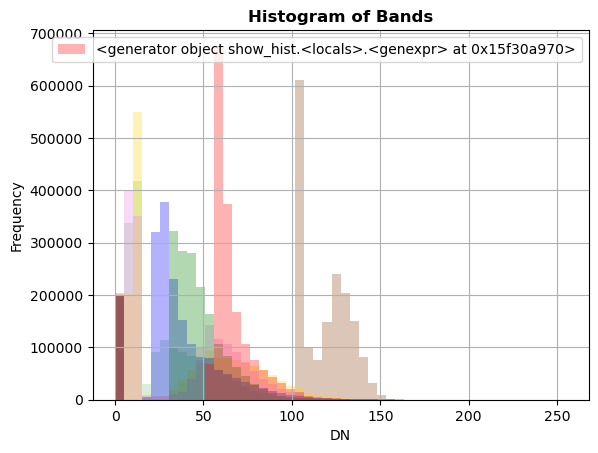

In [97]:
from rasterio.plot import show_hist

show_hist(
    dataset, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram of Bands")

In [126]:
dataset.bounds

BoundingBox(left=698592.0, bottom=6656859.0, right=735300.0, top=6697870.5)

In [146]:
'X - ', dataset.bounds[0], dataset.bounds[2], '-', 'Y - ', dataset.bounds[1], dataset.bounds[3]

('X - ', 698592.0, 735300.0, '-', 'Y - ', 6656859.0, 6697870.5)

In [149]:
np.mean([dataset.bounds[0], dataset.bounds[2]]), np.mean([dataset.bounds[1], dataset.bounds[3]])

(716946.0, 6677364.75)

## Raster Operations

### Raster Math 

![raster-math](https://desktop.arcgis.com/en/arcmap/10.7/tools/spatial-analyst-toolbox/GUID-D8BD897C-B7A2-46A5-93DC-121409FF4C0D-web.png)

Source: https://desktop.arcgis.com/en/arcmap/10.7/tools/spatial-analyst-toolbox/cell-statistics.htm

## Sampling Raster Values

In [212]:
sample_coordinates = [
    (716946.0, 6677364.75),
    (716846.0, 6676164.75),
    (714846.0, 6666164.75),
    (720846.0, 6668164.75),
]

samples = [x for x in dataset.sample(sample_coordinates)]

In [213]:
samples

[array([ 65,  48,  34,  44,  41, 128,  27], dtype=uint8),
 array([ 86,  64,  69,  47,  55, 134,  42], dtype=uint8),
 array([ 55,  34,  25,  10,  10, 105,  11], dtype=uint8),
 array([ 59,  34,  28,  11,  11, 104,  10], dtype=uint8)]

## Zonal Statistics 

![img](https://gisgeography.com/wp-content/uploads/2020/10/Zonal-Statistics.png)

Source: https://gisgeography.com/zonal-statistics/


Zonal statistics summarizes the cells for a given region or line. 


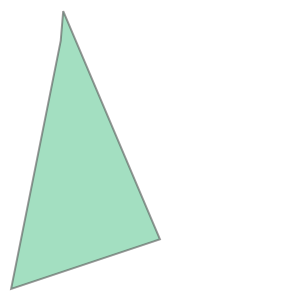

In [214]:
Polygon(sample_coordinates)

In [238]:
from shapely.geometry import mapping, Polygon
import fiona

poly = Polygon(sample_coordinates)

schema = {'geometry': 'Polygon'}

with fiona.open('data/sample_coordinates.shp', 'w', 'ESRI Shapefile', schema) as c:
    c.write({'geometry': mapping(poly)})

In [239]:
from rasterstats import zonal_stats

In [240]:
stats = zonal_stats('data/sample_coordinates.shp', helsinki_local_file, band=1, stats=['min', 'max', 'median', 'majority', 'sum'])
stats

[{'min': 27.0,
  'max': 252.0,
  'sum': 2369558.0,
  'median': 60.0,
  'majority': 60.0}]

In [241]:
stats = zonal_stats('data/sample_coordinates.shp', helsinki_local_file, band=6, stats=['min', 'max', 'median', 'majority', 'sum'])
stats

[{'min': 103.0,
  'max': 160.0,
  'sum': 4071344.0,
  'median': 105.0,
  'majority': 105.0}]

# Pandas

# Introduction to Pandas

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Source: https://pandas.pydata.org/pandas-docs/stable/index.html

You can think of Pandas as the table (.dbf) of a Shapefile or as a Sheet in Excel or Google Spreadsheet. 

## Pandas DataFrame
> DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input. Source: https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html


![pandas_dataframe](https://pandas.pydata.org/pandas-docs/stable/_images/01_table_dataframe.svg)
<center> Source: https://pandas.pydata.org/pandas-docs/stable/getting_started </center>

## Pandas Input Data Types 

# GeoPandas

## Folium

In [244]:
import folium 

m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=3,
    tiles='Stamen Terrain'
)

folium.Marker(
    [63.0690, -151.0063], 
    popup='<i>Denali</i>',
).add_to(m)

folium.Marker(
    [36.5786, -118.2920], 
    popup='<b>Mount Whitney</b>',
).add_to(m)

m